# Agenda
### Classification Metrics
- ROC

- AUC

- Precision Recall Curve

- Cheat sheet for which metric to use when


### kNN (k nearest neighbors)
- Geometric Intuition
- Code Implementation of KNN from Scratch
- Assumption of KNN
-  Train and Test Time-Complexity


# **ROC (Reciever Operating Characterstic Curve)**

The term ROC comes from electronics and radio engineering

- One of the beautiful application of this in second world war for detection of planes and ships
- usually used in signal procressing

Now, let's try to understand ROC in terms of ML

### Intuition
Imagine we have a binary classification (class 0/1)

If we want to measure how well a model is performing, we use metric called AU - ROC i.e. Area Under ROC curve a.k.a AUC (Area under curve)

<img src='https://drive.google.com/uc?id=1756dJy7wez6-vrOjBwKyUrtEA-1ZBJNF'>


Let's say we have some test data with
- n datapoints of d dimensions $x_i$
- actual class labels $y_i$
- predicted probability $ŷ_i$ 

We sort the datapoints using the probability score in desc. order

#### Question: If i have n datapoints of d- dim, what will be the time complexity of sorting ?a

Ans: $n.log(n)$

<img src='https://drive.google.com/uc?id=1SOvwOtshJxESOfLDEGmDOEmIJoszNtPq'>


After sorting the datapoints by predicted probability,

- We set each $ŷ_i$ as threshold ($τ_i$) and classify as 
 - If $ŷ_i > τ_i$ then classify as 1, else 0.
 - let these be $ỹ_{τ_i}$
- continue doing the same for all $ŷ_i$ values.
- Now calculate True Positive Rate$_i$ (TPR$_i$ ) and False Positive Rate$_i$  (FPR$_i$ ) for  $y$ and $ỹ_{τ_i}$

<img src='https://drive.google.com/uc?id=1I2tEAlrldB2q_VlXRoQpAagGYGoR1ocz'>


For example:

Let $τ_1$ = 0.95
- We then calculate $ỹ_{τ_1}$ 
    - 1 , if $ŷ_i$ ≥ $τ_1$
    - 0, otherwise

Then we calculate $TPR_1$ and $FPR_1$ using y and $ŷ_{τ_1}$

Similarly, we calulate $TPR_2$ and $FPR_2$ using y and $ŷ_{τ_2}$

<img src='https://drive.google.com/uc?id=1lzGDOBUKZ6Zkrumct3KdeZM5Hb_jn0Hy'>



Now, after calculating TPR and FPR for each threshold, we'll get n pairs of TPR and FPR

Using these TPR and FPR, we plot the graph between all TPR 𝑖  and FPR 𝑖  as we have  𝑛  pairs of TPR and FPR's

#### Question: What will be the best score for TPR?
Ans: 1 .when TP = P i.e. No False Negatives TPR = TP/P 

#### Question: What will be the best FPR?
Ans: 0 (when there are no false positives) FPR = FP/ N

A model with TPR = 1 and FPR = 0 will be best model.




For plotting, we'll have TPR on y axis and FPR on x- axis


However, for a good model, 
- we tend to have a curve
- This curve is made using pairs of TPRs and FPRs we calculated earlier

#### Why is curve starting at (0,0)? 
Since we are classifying all the points as 0 except 1 point for first threshold (0.95), the TPR as well as FPR will be 0


### Why is right end of curve at (1,1) ? 
For n-th threshold, we are classifying every point as class 1.

Since all the points are being precdicted as positive point 
- Hence, TPR will 1 as all actual positive are predicted as positive
- Also, FPR will be 1 as all negative points are classifed as positive as well.

<img src='https://drive.google.com/uc?id=1_KJr4Cpueij5rgKIVgnztyuvcydJkgxD'>

# **AUC**

Now that we have got our curve, we find the Area Under the ROC Curve (AU-ROC or AUC) (green shaded area)

<img src='https://drive.google.com/uc?id=10o4Vze5KjRRTZwF2B_37qQcV96mMlbiE'>


#### Question: What will be the AU-ROC for best model ? 
The curve for best model will pass through best model point (0,1) and it'll have an AUC of 1.

#### What will be the AUC for worst model?
The curve for worst model will pass through (1,0) and it'll have an AUC of 0.

Let's say we have two models
- Model A (blue curve)
- Model B (cyan curve)

### **Which model is better? A or B ?** 

As the curve move away from (1,0) and towards (0,1), the model gets better 
- As curve move towards (0,1), AUC increases.

AUC of Model B > Model A. Hence Model B is better

<img src='https://drive.google.com/uc?id=1wL3mrCSOvtxfblLQqfHsm86X024JL467'>


# **Fundamental difference between previous metrics and AUC**

When we calcualte Precision, Recall or F1 score
- We calculate it for a certrain threshold on $ŷ_i$
- This threshold is 0.5, by deafult

On the otherhand, AU-ROC
- we are calculating it using all possible thresholds 


When we are comparing Model A and Model B, we are comparing it across all the thresholds and Model B is better than Model A across all the thresholds




<img src='https://drive.google.com/uc?id=1yH4MGscx15Riy8jjVscp-k3tyMsNiY5L'>


## **AUC for random model**

Let's say we have a random model i.e. $ŷ_i$ is randomly generated

#### Question: How will the ROC curve for random model look?

Ans: It will be a diagonal 

#### What will be the AUC of random model?

Ans: 0.5 

#### (FAANG) Question: Why the AUC of random model 0.5 ? 

We can see from the curve TPR$_i$ and FPR$_i$ ∀ τ$_i$. 

Why will the TPR = FPR for random model? 

Let's try to understand it.

We know that, for random model
- $ŷ_i$ will be randomly generated
- if we sort $ŷ_i$ in decreasing order, it'll be same as jumbling up the $y_i$.







<img src='https://drive.google.com/uc?id=1EvpiW7sB7H6m8exbTfw5zd6VHwsm5K-i'>


Now, when we randomly jumble up the $y_i$
- Assuming we have equal number of class 0 and class 1 in $y_i$ 
- P = n/2 
- N = n/2

For $i^{th}$ threshold ($τ_i$),
- We'll get k TP points
- k FP points as points are randomly jumbled up

TPR = $TP/P$ = $k /(n/2)$

FPR = $FP/N$ = $k / (n/2)$

Hence, TPR = FPR ∀ thresholds τ$_i$


<img src='https://drive.google.com/uc?id=1dPv3foo4tBJSt-yGzzTuHsARYB9jSuS0'>


# **Properties of AU-ROC**

1.  It does not work well for the **highly imbalanced data set**
    - It works for slightly imbalanced data but not for highly imbalanced data
2.  AU-ROC does not depend on the actual values of the $ŷ_i$ but only depends on the order of them. 


<img src='https://drive.google.com/uc?id=1merJQSkMpmoz94cGUQA_o3YWGTdKdbY7'>


Let's say we have two model M1 and M2
- actual y labels are : [1, 1, 0 ,1, 1]
- predicted probabilities for M1 are: [0.95, 0.92, 0.80, 0.76, 0.71]
- predicted probabilities for M2 are: [0.2, 0.1, 0.08, 0.06, 0.01]

Since, we will be using each probability value as threshold and calulating AUC
- the ordering of threshold isn't changing and hence TPR and FPR will be same.


<img src='https://drive.google.com/uc?id=15QvWJC9yqHD6A3bQqwbeRNW4vKIWgYGW'>


3. Random Model has AU-ROC of 0.5
4. When model's AOC is less than 0.5, the simple fix for the model is to invert your predictions. i.e After inversing you will get area of 1-(actual area value)

<img src='https://drive.google.com/uc?id=1-4YMd57VOd-4BDZvfuAYBsd9DGoO8sGA'>


### Code walkthrough

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [ ]:
fpr, tpr, thr = roc_curve(data.y, data.proba)

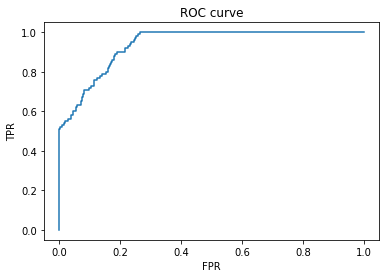

In [ ]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
roc_auc_score(data.y, data.proba)

0.9377570000000001

### **Issue with AU-ROC**

AU- ROC doesn't work well on extremely imbalanced data.

However, we saw that Precision, recall and F1 score work well on highly imbalanced data.

So, what if we make curve using Precision Recall ? i.e. Precision Recall Curve

<img src='https://drive.google.com/uc?id=1FcWrAX6Aj7gwd-4u-4Z8zerGYm6WcEXT'>



# **Precision - Recall curve**

In Precision Recall curve
- Precision on y axis
- Recall on x axis
- Similar to ROC curve, we'll take each $ŷ_i$ as threshold


The area under this curve is called AU-PRC, Area under precision recall curve, which is a very good metric for very highly imbalanced data.

<img src='https://drive.google.com/uc?id=1yKD_EuZ3CxZRpBYSTcDaZpQtArwIYHMG'>

### Code walkthrough

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [ ]:
precision, recall, thr = precision_recall_curve(data.y, data.proba)

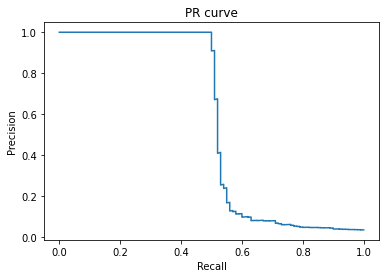

In [ ]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [ ]:
auc(recall, precision)

0.5547651464107343

## Cheat sheat for which metric to use when 

- If we want probabilities of classes: Log loss
- If classes are balanced: Accuracy
- IF classes are imbalanced: 
    - and if we are more concerned about False positive and true positive, then we use precision.
    - If we are more concerned about False Negatives and True positive then we use recall.
    - F1 score is a balance between precision and recall.
    - If our concern is both classes (true negative and true positive) then we use ROC_AUC
- If severe imbalance : PR AUC

# Confusion matrix for multi class classification

#### (Interview question) Can we create confusion matrix for multiclass scenario ? 

We can create confusion matrix for multiclass scenario as well

Let's assume we have 3 classes
- We'll have a grid of $3×3$
- rows will represent actual label (0,1,2)
- columns will represent predicted labels (0,1,2)

Here, the diagonal values i.e. where the predicted value matches the actual value should be high. Rest of the values should be low.

Do Note: we can't have TP, TN, FP, FN terminology for multiclass setting.

We can also build confusion matrix for multiclass using one vs rest approach
- Built multiple confusion matrix i.e
    - 0 vs 1 or 2
    - 1 vs 0 or 2
    - 2 vs 0 or 1

But, we usually prefer the former single matrix approach because of its simplicity.



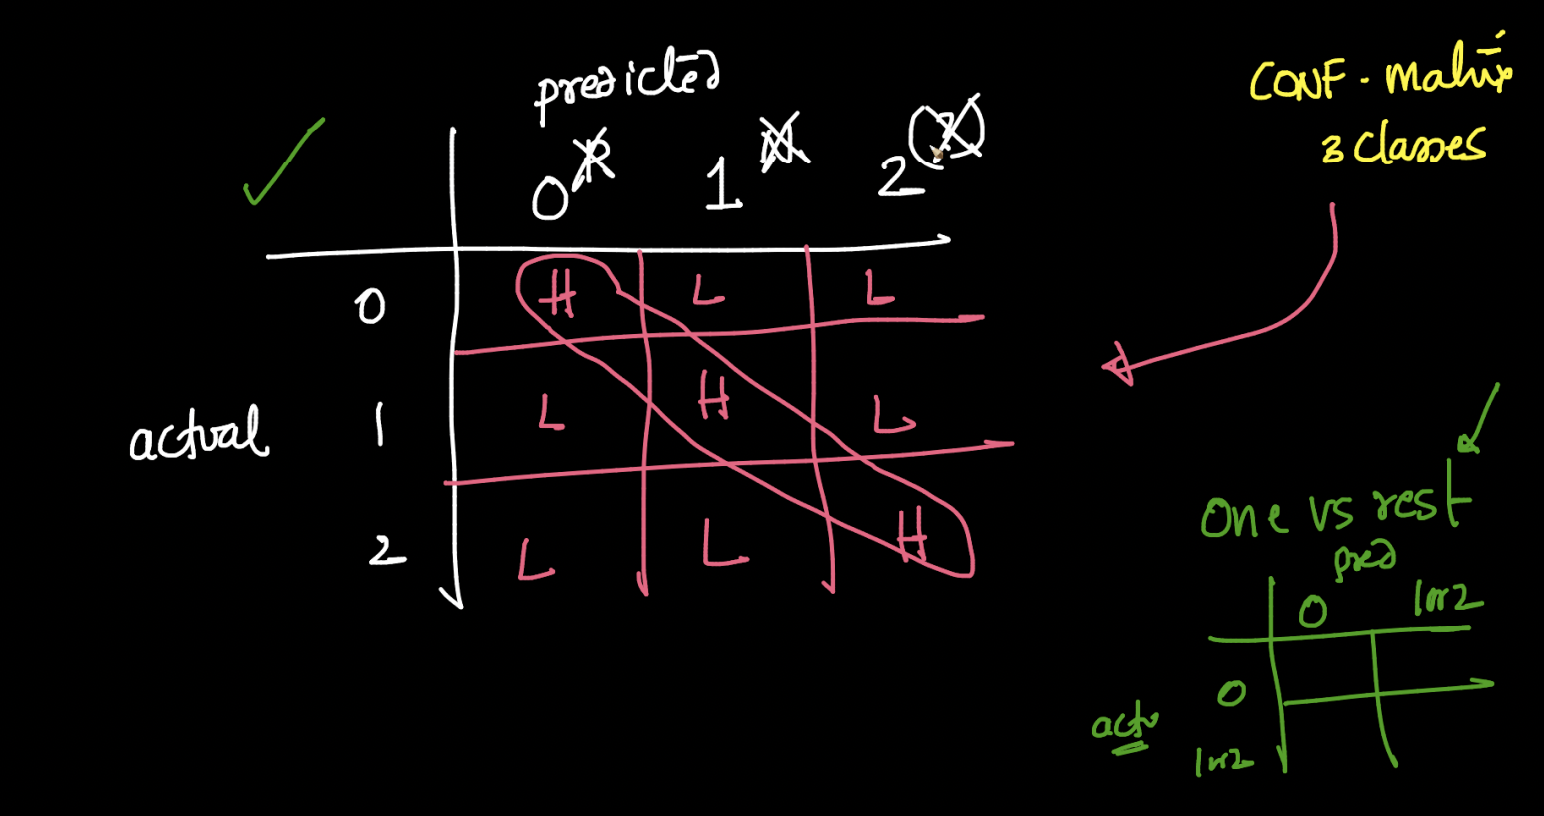

# **KNN**

### Geometric Intuition

#### Question: What can be an issue with One vs Rest method ?
- Ans: In real world problems, we can have K number of classes and building K different logisitic Regression model is not the most efficient way.


Hence we have a simplier and much easier algorithm to perform Multi-Class Classification of our data which is KNN or K- Nearest Neighbor. 

Lets understand KNN algorithm geometrically with a simple example:
-  Lets assume we have a few +ve class data and -ve class data points in our Training data

- Now in our test data we have a query point $x_q$

#### What will be the class label for $x_q$ ?
- From the plot, its  Most likely to be +ve class data point
- Since all the surrounding points are +ve

Now if we had a $x_q$ in the near the -ve class data points then 
#### what will the class label for $x_q$ be ? 
- -ve since the surrounding points are all -ve



**This shows that KNN is a neighborhood Algorithm, since it checks the neighborhood of $x_q$ and then assigns class label to the data point.**

#### But if now our $x_q$ is at point such that there are 3 -ve class data points and one +ve class data point, what will the class label for $x_q$ for such case be ?
- Now if we are considering 4 points around $x_q$ , we can say
    - $x_q$ belongs to -ve class since majority of neighbor points are -ve class labels

- but if we consider only 1 point around $x_q$, we can say
    - $x_q$ belongs to +ve class since the distance between the +ve class data point and $x_q$ is minimum

Hence this means that the number of points we consider as our neighborhood thus impacts the KNN. 
- Therefore the K in the KNN means the number of  points we are to consider as our neighborhood.

















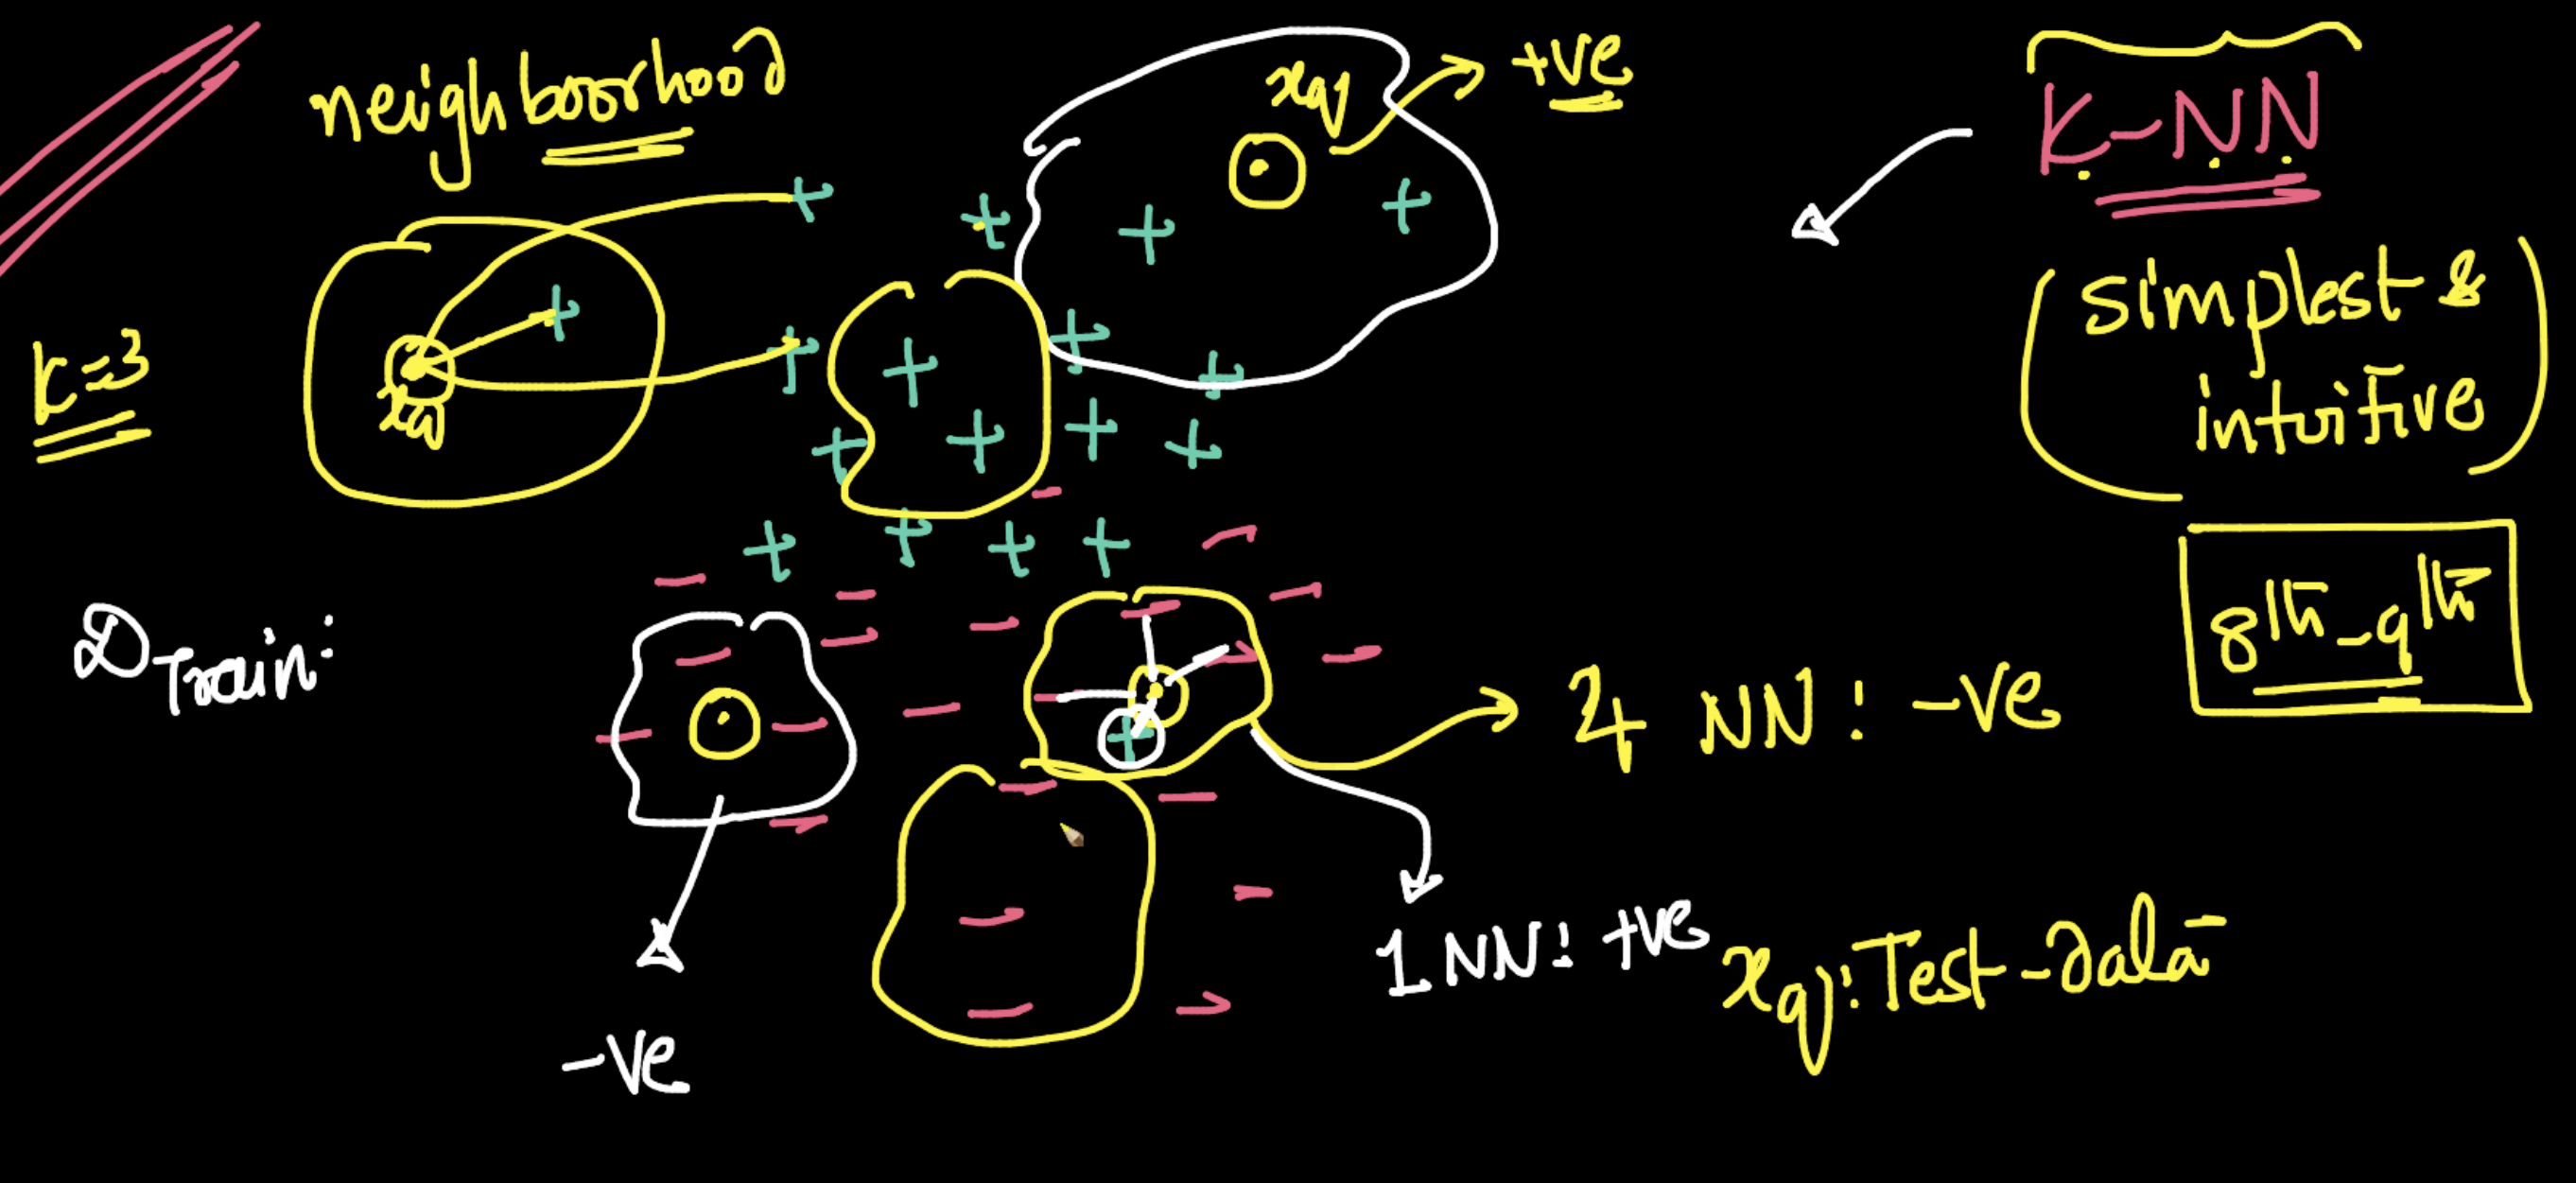

- We already have training data with us, and we have a data point $x_q$ in test data, 

Lets write the pseudo code for KNN algorithm
# **The KNN Algorithm**
1. for each $x_i$ in training data
    - Compute distance between $x_i$ and $x_q$
    - And store it in a distance vector $D$
2. Sort the distance vector $D$
3. Then pick the K Nearest Neighbors, or the points which have the least distance from $x_q$
4. Take majority vote of class label from all the K points and return the class label which has the max vote for $x_q$ 

In simple words, 
- if we take K = 5, and after sorting the distance vector 
- we get 3 +ve class label data points and 2 -ve Class label data  
- then through majority voting, $x_q$ will belong to +ve class.




    

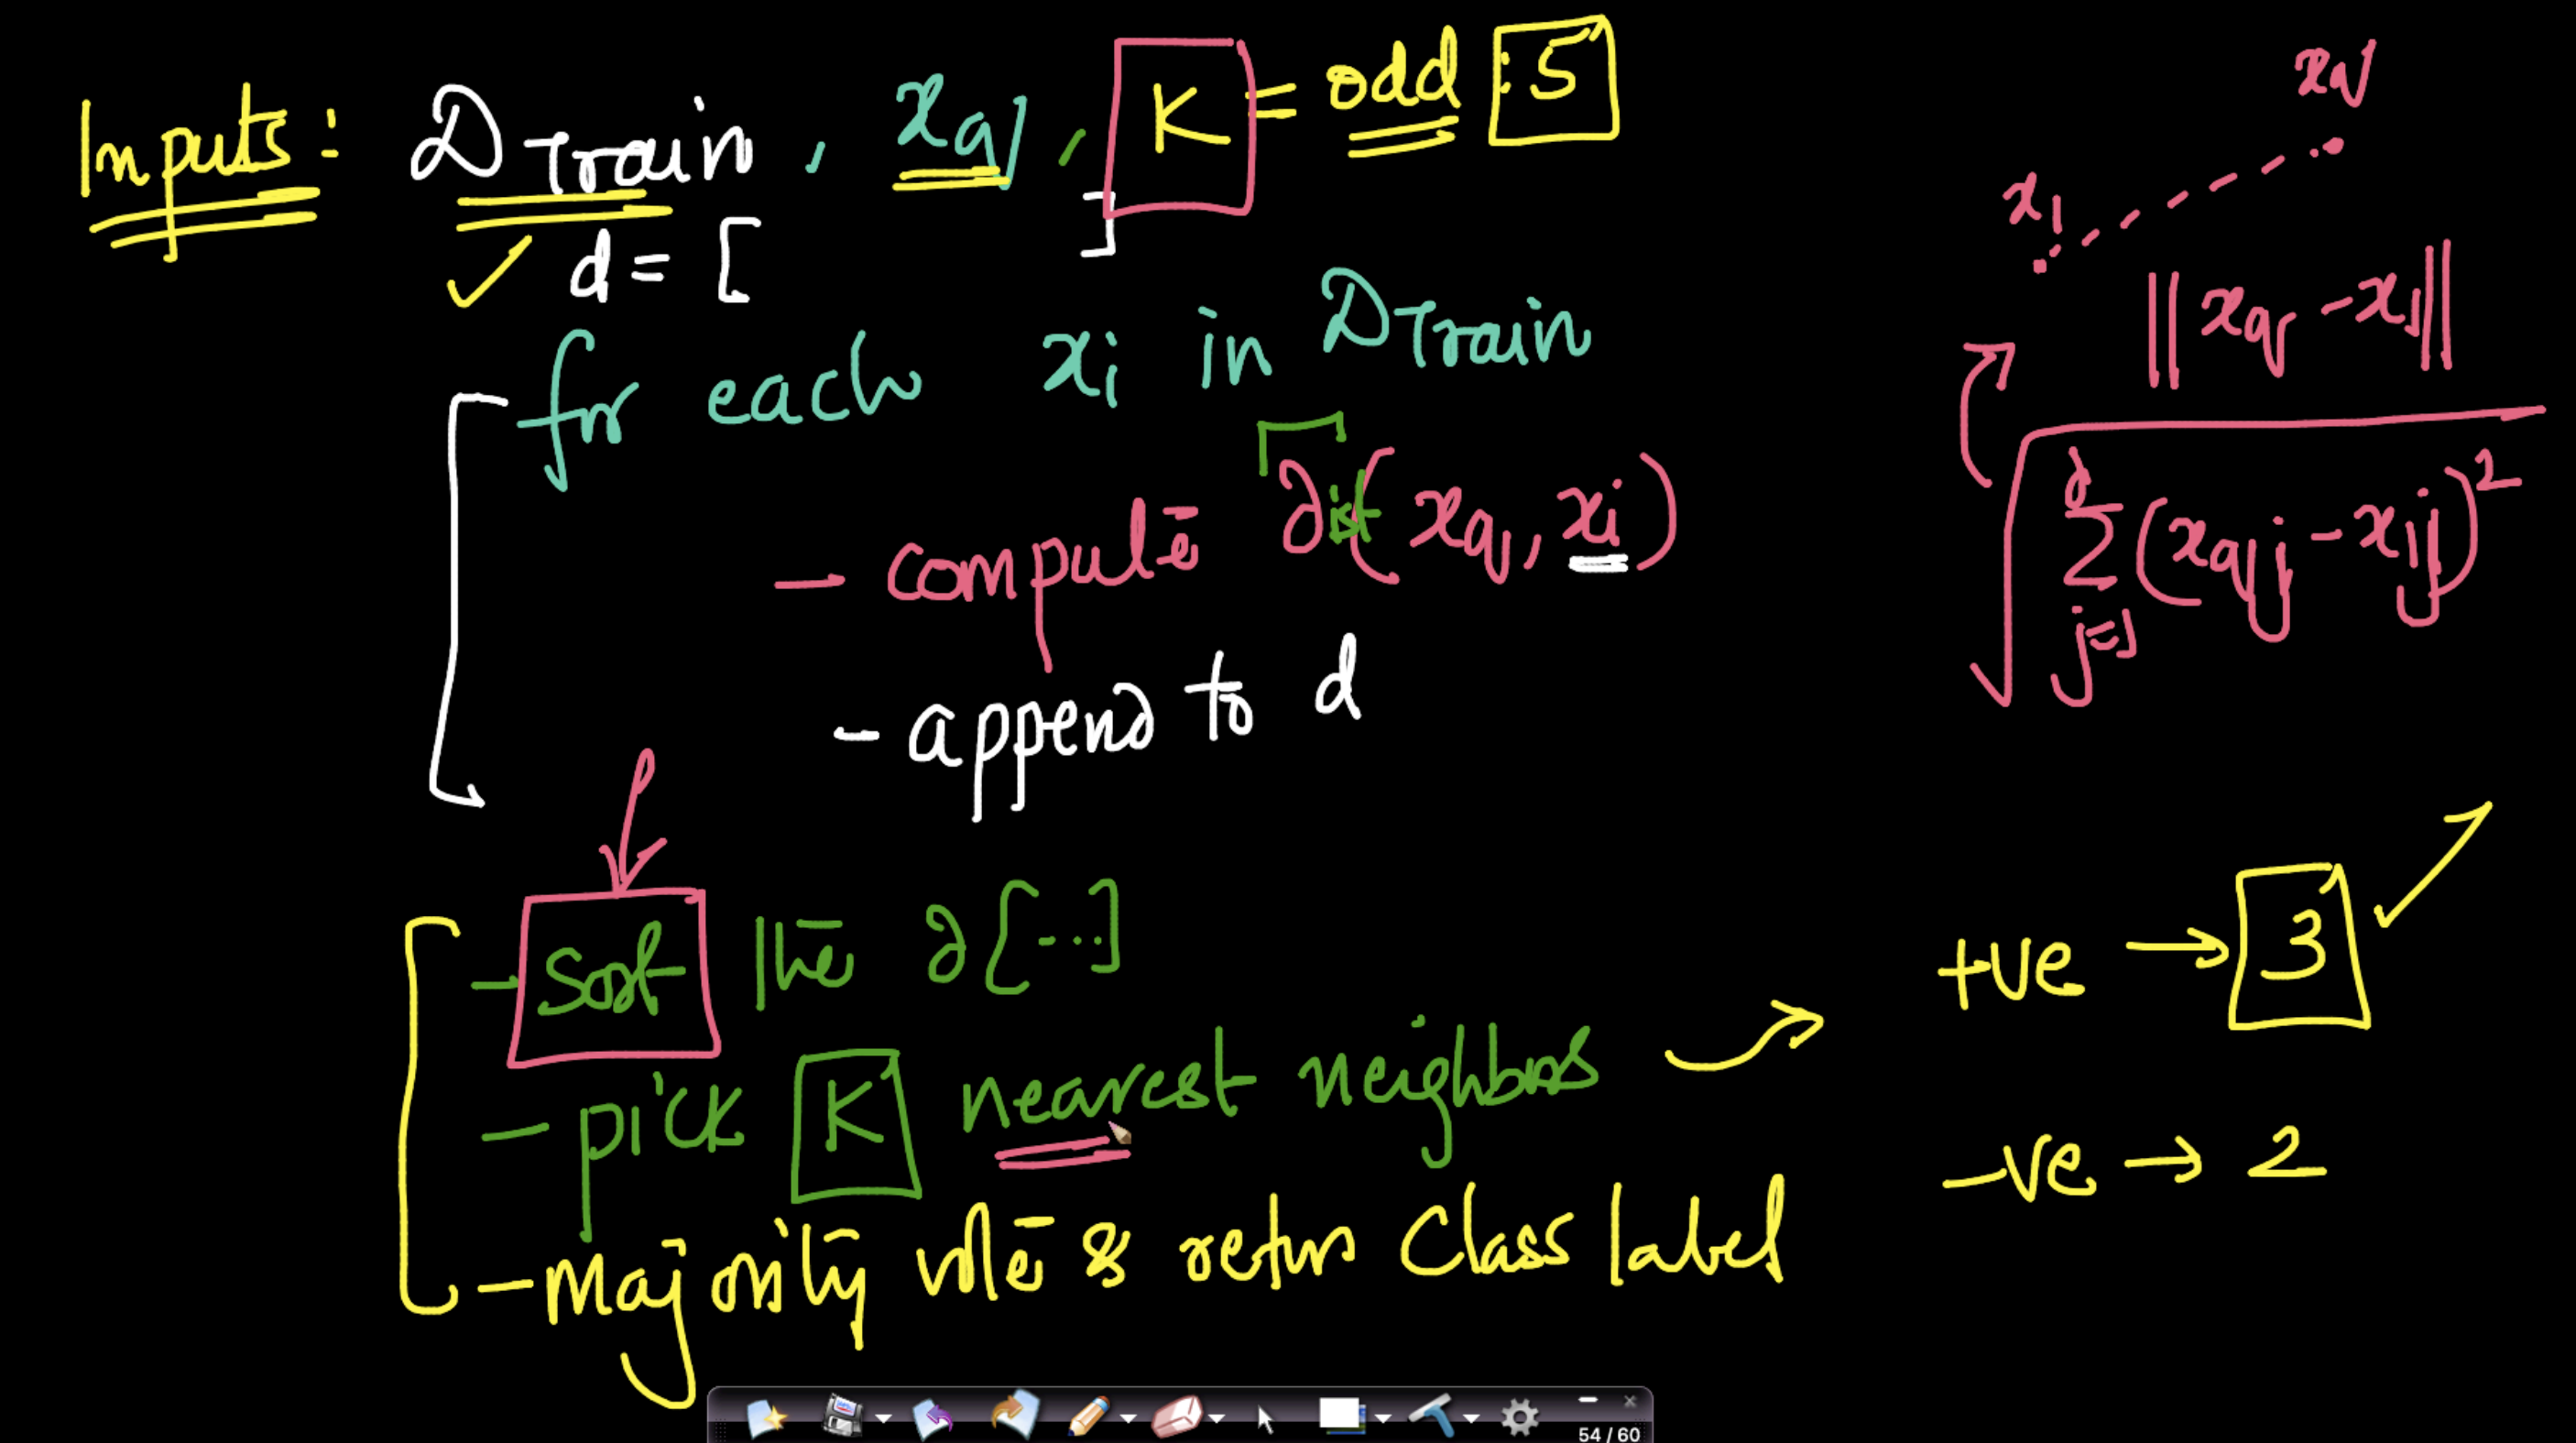

### Code Implementation of KNN from Scratch 

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#### Lets create Synthetic Data
- f1 : Number of calls made to a learner to enroll them in a program.
- f2 : After attending the first masterclass in How manys days a person has taken the decision to enroll or not enroll.

In [ ]:
!gdown 1OT-cQgru6tEUlsBxEVDvKcfg5FmgQYml

Downloading...
From: https://drive.google.com/uc?id=1OT-cQgru6tEUlsBxEVDvKcfg5FmgQYml
To: /content/scaler.csv
100% 9.92k/9.92k [00:00<00:00, 13.0MB/s]


In [ ]:
data = pd.read_csv('scaler.csv')
data.shape

(400, 5)

In [ ]:
data.head()

User_ID  Gender  No_of_Days  No_of_Calls  Enrolled
0  15624510    Male           0         0.30         0
1  15810944    Male          15         0.37         0
2  15668575  Female           6         2.07         0
3  15603246  Female           7         3.11         0
4  15804002    Male           0         4.52         0

Plotting f1 = No of Days, f2 = No of Calls and seeing how these feature classifies data


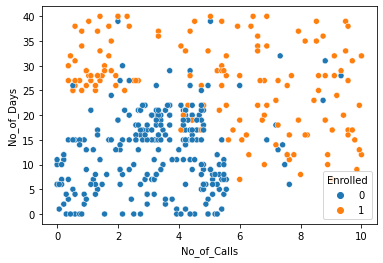

In [ ]:
sns.scatterplot(data= data, x= 'No_of_Calls',y = 'No_of_Days' , hue = 'Enrolled')

Here we can clearly see that the data is non-linearly seperable

Lets now splitting the data into train and test set by considering into these two features 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['No_of_Calls', 'No_of_Days']].values,\
                                                    data['Enrolled'].values,\
                                                    test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(268, 2) (268,)
(132, 2) (132,)


Standardization of data 

In [ ]:
mu = X_train.mean(axis=0)
sig = X_train.std(axis=0)

In [ ]:
X_train = (X_train-mu)/sig
X_test = (X_test-mu)/sig

kNN Implementation from Scratch

In [ ]:
def dist(x1,x2):
    """Euclidean distance between 2 vectors"""
    return np.sqrt(np.sum((x1-x2)**2))

# Test Time 
def knn(X,Y,queryPoint,k=5):
    """Predict the class label for the query point"""
    
    distances = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        distances.append((d,Y[i]))
        
    # sort the distances
    distances = sorted(distances)
    # Nearest/First K points
    distances = distances[:k]
    
    distances = np.array(distances)
    
    #print(distances)
    
    classes_counts = np.unique(distances[:,1],return_counts=True)
    #print(classes_counts)
    
    index = classes_counts[1].argmax()
    pred = classes_counts[0][index]
    
    return int(pred)

taking the 100th test data as our $x_q$

In [ ]:
X_test[100]

array([1.52384549, 1.91535276])

Predicted class label for $x_q$

In [ ]:
knn(X_train, y_train, X_test[100])

1

Actual label for $x_q$

In [ ]:
y_test[100]

1

- notice that our model performed predicted the labels correctly

- Now lets see the accuracy of our KNN on test data

In [ ]:
y_pred = np.zeros(X_test.shape[0])

for i in range(X_test.shape[0]):
    y_pred[i] = knn(X_train, y_train, X_test[i])

print(f'Accuracy :{round(100*(y_pred == y_test).sum()/y_pred.shape[0], 2)}')

Accuracy :93.94


- We see how our KNN model performed quite well.

## **Assumption of KNN:** 
- just like we saw how in Logistic Regression, an assumption a linearly separable hyperplane exists, 

- Similarly, The KNN algorithm assumes that similar datapoints exists in close neighborhood. 
- In other words, Neighborhoods are homogeneous is that, similar things are near to each other




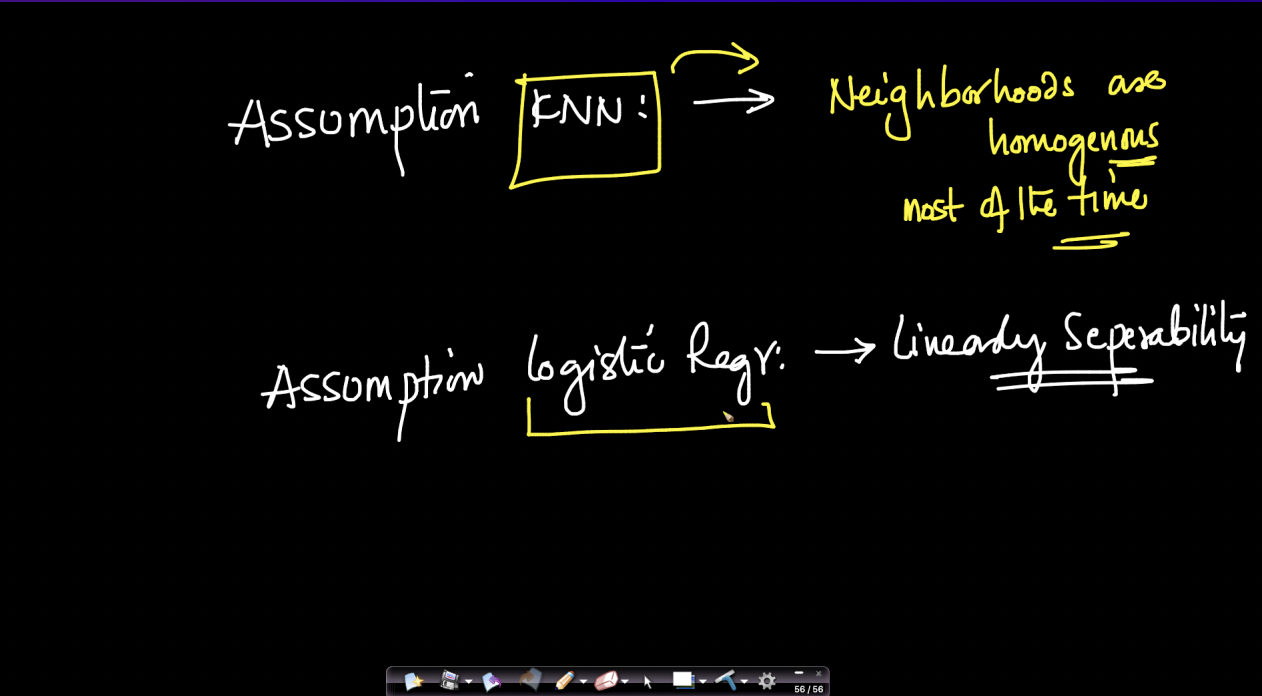

# **Time-Complexity of KNN**




- we all have learnt searching and sorting algorithms, but fail to understand where to use them. 
- if we look closely, KNN uses sorting algorithms so to quickly have a sorted distanc vector $d$.



Supposedly we have n samples (datapoints) and each datapoint is d-dimensional


## **What will be the time complexity to run KNN on one test point $x_q$ ?**

1. we find distance of all datapoints {$x_1,x_2,..x_i,..,x_n$} with respect to  $x_q$
    - the time complexity will be : $O(n.d)$

2. we then sort the distance vector $D$ 

#### which sorting algorithms can we use which has minimum time complexity ?
- Merge Sort, time complexity being $O(nlogn)$

3. Now we select K-top points on the distance vector and the time complexity becomes $O(K)$



So our overall test-Time-Complexity for KNN becomes $O(nd+nlogn+K)$

- since K is a very small value as compared to n and d,  we can neglect it
- Now our Complexity becomes $O(n(d+logn) )$


**Now lets understand what will be the Space-complexity for KNN**
- n samples (datapoints) and each datapoint is d-dimensional and we select top K points
- So Space-Complexity becomes : $O(n.d + K.d)$
- but K is very small, hence we neglect K.d 
-  Now the Space-Complexity becomes $O(n.d)$

We have been talking about,
- How can we calculate distance between $x_q$ and the other datapoints $x_i$


This is a BRUTE-FORCE Algorithms, And we can see how much of a memory and time this Brute-Force KNN algorithm requires. 
- this becomes a major disadvantage for KNN

- But there are State of Art models (SOTA) which are bleeding edge KNN algorithms
    - [Google ScaNN: Efficient Vector Similarity Search](https://ai.googleblog.com/2020/07/announcing-scann-efficient-vector.html)
    - [Facebook Faiss](https://engineering.fb.com/2017/03/29/data-infrastructure/faiss-a-library-for-efficient-similarity-search/)

## **What about the train complexity for KNN ?**
- If you noticed, we do not train KNN models.
- we just have some Training data on which we put our test data $x_q$.
- So the time complexity for training data becomes $O(1)$



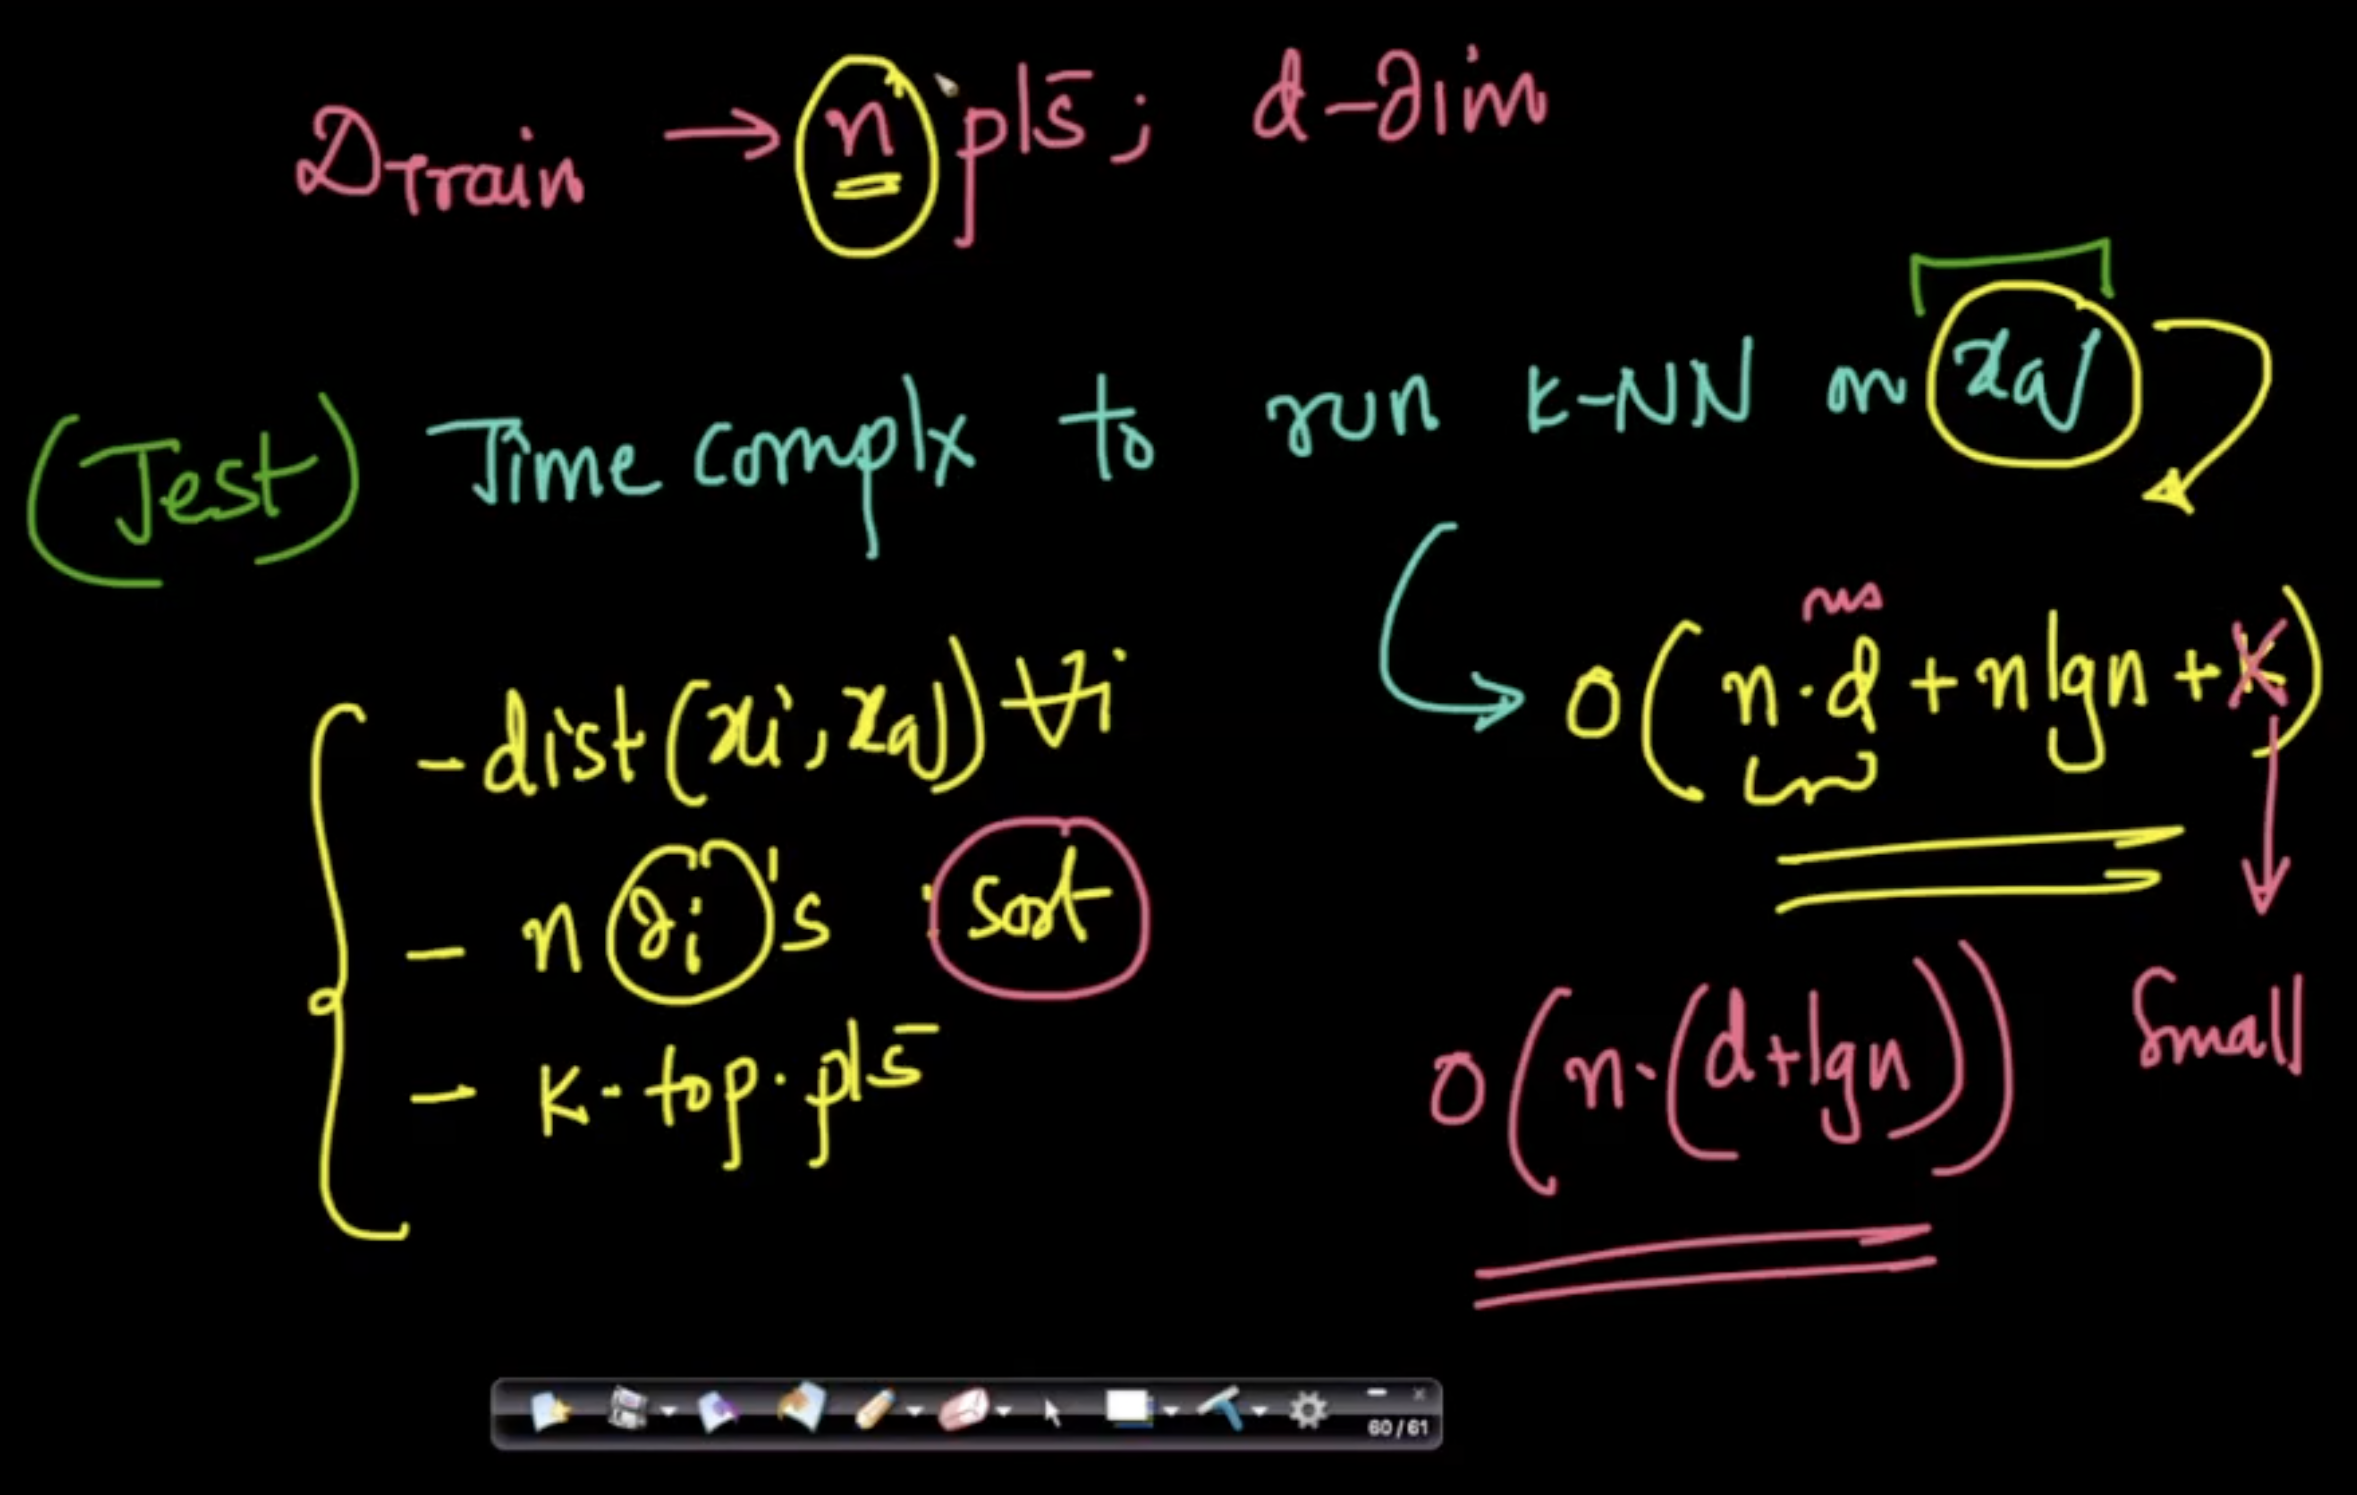